### Importing library

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing data

In [114]:
tr = pd.read_csv('train.csv')
ts = pd.read_csv('test.csv')


### Missing Values in given data

In [115]:
tr.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [116]:
#Passengerid has no null values
tr.PassengerId.isnull().sum()

0

In [117]:
# pclass has also no null values
tr.Pclass.isnull().sum()

0

### Cleaning Data


#### Name Clean 

In [118]:
#df = tr.copy()
#sns.countplot(x='Name',data = df)
#sns.barplot(x='Name', y='Survived',data=df)

def cleaning_Name(df):
        df.Name = df.Name.str.split(' ').apply(lambda x : x[1])
        title = ['Dr.', 'Rev.', 'y', 'Impe,',
        'Planke,', 'Mlle.', 'Gordon,', 'Major.', 'Col.', 'der', 'Steen,',
        'Pelsmaeker,', 'Mulder,', 'Ms.', 'Carlo,', 'Jonkheer.', 'Messemaeker,',
        'Melkebeke,', 'Don.', 'Walle,', 'Billiard,', 'the', 'Capt.', 'Shawah,',
        'Velde,', 'Cruyssen,', 'Mme.','Brito,','Khalil,','Palmquist,']
        df.Name.replace(title, 'others_title',inplace =True)
        return df

In [119]:
#df = tr.copy()
#cleaning_Name(df)

In [120]:
#df.Name.value_counts()

#### Sex Clean 


In [121]:
#df = tr.copy()
#df.Sex.value_counts()
#df.Sex.isnull().sum()
## No need to be clean as no null values is present

In [122]:
#sns.set_style('whitegrid')
#sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')


#### Age Clean

In [123]:
df = tr.copy()
df.Age.isnull().sum()

177

In [124]:
##AS we can replace average of age to the null values but as avg. age can be find as Pclass i.e Passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

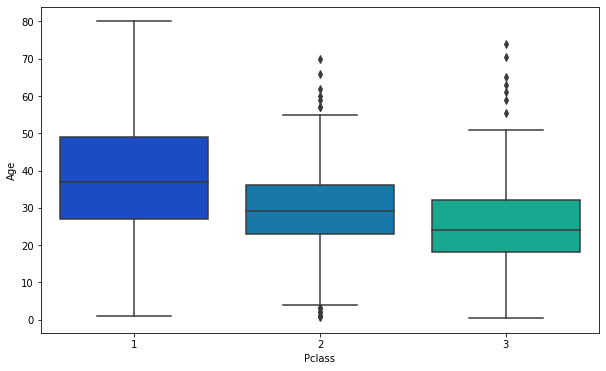

In [125]:
df = tr.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [126]:
## As we can clearly see that avg. age group of 37 yr were in Pclass1, avg. age group of 29 yr were in Pclass2 
## and avg. group of 23yr were present in Pclass3.

In [127]:
def FillnanAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 23

    else:
        return Age

In [128]:
tr['Age'] = tr[['Age','Pclass']].apply(FillnanAge,axis=1)

In [129]:
ts.Age.isnull().sum()

86

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

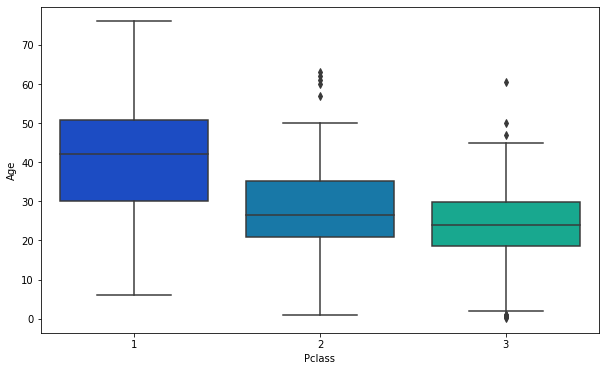

In [130]:
df = ts.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [131]:
def FillnanAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 26

        else:
            return 25

    else:
        return Age

In [132]:
ts['Age'] = ts[['Age','Pclass']].apply(FillnanAge,axis=1)

#### Sibling spouse(Sibsp) and Parent Children(Parch)  joining together as a family 

In [133]:
def Family(df):
    df['Family'] = df.SibSp + df.Parch
    df.drop(['SibSp' , 'Parch'],axis =1,inplace = True)
    return df

<AxesSubplot:xlabel='Family', ylabel='Survived'>

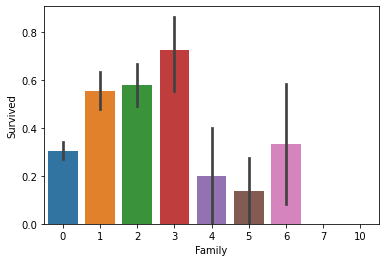

In [134]:
df = tr.copy()
Family(df)
sns.barplot(x  = 'Family',y = 'Survived',data=df)

#### Ticket Clean 

In [135]:
def cleaning_Ticket(df):
    df.drop(['Ticket'], axis = 1 , inplace=True)
    return df

In [136]:
#df = tr.copy()
#cleaning_ticket(df)

#### Fare Clean

In [137]:
df = tr.copy()
df.Fare.isnull().sum()

0

In [165]:
def cleaning_Fare(df):
    df.drop(['Fare'], axis = 1 , inplace=True)
    return df

In [166]:
#df = cleaning_Fare(df)


#### Cabin Clean

In [168]:
#df = tr.copy()
#df.Cabin.isnull().sum()
#def cleaning_Cabin(df):
    

In [169]:
def Cleaning_Cabin(df):
    df.fillna('N',inplace=True)
    df.Cabin = df.Cabin.apply(lambda x : x[0])
   # df.Cabin.value_counts()
    return df
#sns.barplot(x  = 'Cabin',y = 'Survived',data=df)

#### Embarked Clean 

In [170]:
#df = tr.copy()
# df.Embarked.value_counts()
def Cleaning_Embark(df):
    df.fillna('S',inplace = True)
    return df


In [171]:
#df = Cleaning_Embark(tr.copy())
#sns.barplot(x = 'Embarked',y = 'Survived',data = df)

In [172]:
def Clean_data(df):
    df = cleaning_Name(df)
    df = Family(df)
    df = cleaning_Ticket(df)
    df = cleaning_Fare(df)
    df = Cleaning_Cabin(df)
    df = Cleaning_Embark(df)
    return df
    

In [173]:
df =  tr.copy()
Clean_data(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,Cabin,Embarked,Family
0,1,0,3,Mr.,male,22.0,N,S,1
1,2,1,1,Mrs.,female,38.0,C,C,1
2,3,1,3,Miss.,female,26.0,N,S,0
3,4,1,1,Mrs.,female,35.0,C,S,1
4,5,0,3,Mr.,male,35.0,N,S,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,others_title,male,27.0,N,S,0
887,888,1,1,Miss.,female,19.0,B,S,0
888,889,0,3,Miss.,female,23.0,N,S,3
889,890,1,1,Mr.,male,26.0,C,C,0


In [174]:
tr_clean = Clean_data(tr)

In [175]:
ts_clean = Clean_data(ts)

In [176]:
tr_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,Cabin,Embarked,Family
0,1,0,3,Mr.,male,22.0,N,S,1
1,2,1,1,Mrs.,female,38.0,C,C,1
2,3,1,3,Miss.,female,26.0,N,S,0
3,4,1,1,Mrs.,female,35.0,C,S,1
4,5,0,3,Mr.,male,35.0,N,S,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,others_title,male,27.0,N,S,0
887,888,1,1,Miss.,female,19.0,B,S,0
888,889,0,3,Miss.,female,23.0,N,S,3
889,890,1,1,Mr.,male,26.0,C,C,0


In [177]:
ts_clean

,PassengerId,Pclass,Name,Sex,Age,Cabin,Embarked,Family
0,892,3,Mr.,male,34.5,N,Q,0
1,893,3,Mrs.,female,47.0,N,S,1
2,894,2,Mr.,male,62.0,N,Q,0
3,895,3,Mr.,male,27.0,N,S,0
4,896,3,Mrs.,female,22.0,N,S,2
...,...,...,...,...,...,...,...,...
413,1305,3,Mr.,male,25.0,N,S,0
414,1306,1,others_title,female,39.0,C,C,0
415,1307,3,Mr.,male,38.5,N,S,0
416,1308,3,Mr.,male,25.0,N,S,0


### Preprocessing of data

In [178]:
from sklearn import preprocessing
def col_encode(df_tr,df_ts):
    Features = ['Name','Sex','Cabin','Embarked']
    d = pd.concat([df_tr[Features],df_ts[Features]])
    for F in Features:
        l = preprocessing.LabelEncoder()
        l = l.fit(d[F])
        df_tr[F] = l.transform(df_tr[F]) 
        df_ts[F] = l.transform(df_ts[F])
        df_tr['Age'] = df_tr['Age'].astype(int)
        df_ts['Age'] = df_ts['Age'].astype(int)
    return df_tr,df_ts

In [179]:
train,test = col_encode(tr_clean,ts_clean)

In [180]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Cabin,Embarked,Family
0,1,0,3,2,1,22,7,3,1
1,2,1,1,3,0,38,2,0,1
2,3,1,3,1,0,26,7,3,0
3,4,1,1,3,0,35,2,3,1
4,5,0,3,2,1,35,7,3,0


In [181]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,Cabin,Embarked,Family
0,892,3,2,1,34,7,2,0
1,893,3,3,0,47,7,3,1
2,894,2,2,1,62,7,2,0
3,895,3,2,1,27,7,3,0
4,896,3,3,0,22,7,3,2


In [182]:
X = train.drop(['PassengerId' , 'Survived'],axis =1)
Y = train.Survived

In [183]:
test_df = test.drop('PassengerId',axis =1) 

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [185]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.4,random_state =42)

In [186]:
X_train.shape

(534, 7)

In [187]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.8011204481792717

In [188]:
rf.fit(X,Y)

RandomForestClassifier()

In [189]:
Y = rf.predict(test_df)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [190]:
test['Survived'] = Y

### Result

In [191]:
test

,PassengerId,Pclass,Name,Sex,Age,Cabin,Embarked,Family,Survived
0,892,3,2,1,34,7,2,0,0
1,893,3,3,0,47,7,3,1,1
2,894,2,2,1,62,7,2,0,1
3,895,3,2,1,27,7,3,0,1
4,896,3,3,0,22,7,3,2,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,2,1,25,7,3,0,0
414,1306,1,4,0,39,2,0,0,1
415,1307,3,2,1,38,7,3,0,0
416,1308,3,2,1,25,7,3,0,1
